In [1]:
import copy
import networkx as nx
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt
import math
from itertools import permutations

In [2]:
def readGraphFromFile(filename):
     return nx.read_graphml(filename)

In [3]:
def drawGraph(graph):
    nx.draw(graph, with_labels=True, node_color='skyblue', node_size=400, font_size=10)
    plt.show()

In [4]:
def longestSimplePath2(graph):
    longestPath = []
    n = len(graph.nodes)
    perms = list(permutations([x for x in range(n)]))

    with tqdm(total=math.factorial(n)) as pbar:
        for perm in perms:
            curr_path = []
            for i in perm:
                if len(curr_path) == 0 or \
                    (str(curr_path[len(curr_path)-1]), str(i)) in graph.edges or \
                    (str(i), str(curr_path[len(curr_path)-1])) in graph.edges: curr_path.append(i)
                else: break
                
            if len(curr_path) > len(longestPath): longestPath = curr_path
            pbar.update()
    return longestPath, pbar.format_meter(n, n, pbar.format_dict['elapsed']), pbar.format_dict['elapsed'], n

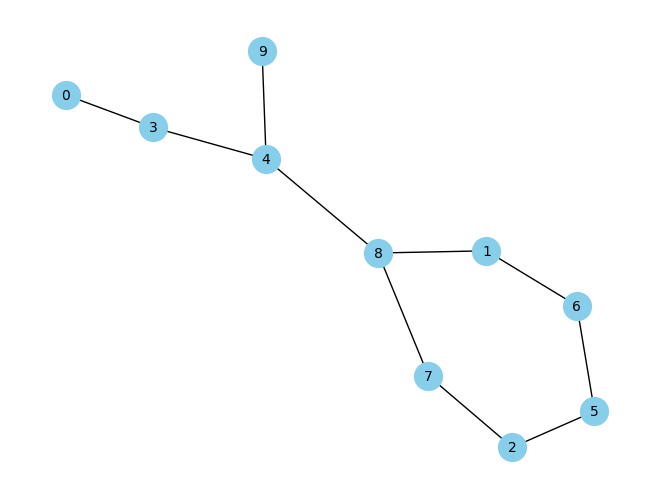

100%|██████████| 3628800/3628800 [00:03<00:00, 917994.91it/s]

Elements of longest simple path: [0, 3, 4, 8, 1, 6, 5, 2, 7]
Longest simple path:  9
Elapsed time: 3.9539635181427s


In [7]:
filename = 'test3.graphml'
printname = 'test3v2.txt'
graph = readGraphFromFile(filename) 
drawGraph(graph)
solution, barProgress, totalTime, iters = longestSimplePath2(graph)
#print("Graph:", graph)
with open(printname, 'w') as f:
    f.write("Elements of longest simple path:\n")
    f.writelines(str(node) + " " for node in solution)
    f.write("\nLongest simple path length: " + str(len(solution)))
    f.write(f"\nNumber of iterations: {iters}")
    f.write(f"\nElapsed time: {totalTime}s")
print("Elements of longest simple path:", solution)
print("Longest simple path: ", len(solution))
print(f"Elapsed time: {totalTime}s")
